# Question 3 [Programming] : ML and MAP estimation of Poisson Distribution

## Install required libraries

In [1]:
!pip install numpy pandas matplotlib

## Import required packages

In [2]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
from scipy.stats import gamma
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
pd.set_option('max_columns',None)

## Read the Dataset 

In [3]:
df = pd.read_csv('Prussian-Horse-Kick-Data.csv')
df.index=df.Corps
df = df.drop('Corps',axis=1)

In [4]:
def poisson_pmf(lambda_value, x):
    return (np.power(lambda_value,x)*np.exp(-1*lambda_value))/np.math.factorial(x)

def mle(data):
    deaths_freq_df = pd.DataFrame.from_dict(pd.Series(data).value_counts().items())
    deaths_freq_df.columns=['deaths','freq']
    mu = sum(deaths_freq_df.deaths*deaths_freq_df.freq)/sum(deaths_freq_df.freq)
    return mu

def rmse(y_true,y_pred):
    return np.sqrt(sum((y_true - y_pred) ** 2)/len(y_true))

## Horse Kicks Dataset 

In [5]:
df

,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,Total
Corps,,,,,,,,,,,,,,,,,,,,,
G,0,2,2,1,0,0,1,1,0,3,0,2,1,0,0,1,0,1,0,1,16
I,0,0,0,2,0,3,0,2,0,0,0,1,1,1,0,2,0,3,1,0,16
II,0,0,0,2,0,2,0,0,1,1,0,0,2,1,1,0,0,2,0,0,12
III,0,0,0,1,1,1,2,0,2,0,0,0,1,0,1,2,1,0,0,0,12
IV,0,1,0,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,8
V,0,0,0,0,2,1,0,0,1,0,0,1,0,1,1,1,1,1,1,0,11
VI,0,0,1,0,2,0,0,1,2,0,1,1,3,1,1,1,0,3,0,0,17
VII,1,0,1,0,0,0,1,0,1,1,0,0,2,0,0,2,1,0,2,0,12
VIII,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,7


## Dataset Info 

In [6]:
print("Total {} years of data is avaialble (i.e from {} --> {})".format(len(df.columns)-1,df.columns.tolist()[0],df.columns.tolist()[-2],))
print("Total Corps :: ",len(df.index)-1)
print('The total number of deaths :: {}'.format(df['Total'].tail(1).values[0]))
print('The total number of obseravations :: {}'.format((len(df.index)-1)*(len(df.columns)-1)))

Total 20 years of data is avaialble (i.e from 1875 --> 1894)
Total Corps ::  14
The total number of deaths :: 196
The total number of obseravations :: 280


## Training Data: First 13 Years of Data

In [7]:
training_data = df[df.columns[:13]].drop('Total')
training_data

,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884,1885,1886,1887
Corps,,,,,,,,,,,,,
G,0,2,2,1,0,0,1,1,0,3,0,2,1
I,0,0,0,2,0,3,0,2,0,0,0,1,1
II,0,0,0,2,0,2,0,0,1,1,0,0,2
III,0,0,0,1,1,1,2,0,2,0,0,0,1
IV,0,1,0,1,1,1,1,0,0,0,0,1,0
V,0,0,0,0,2,1,0,0,1,0,0,1,0
VI,0,0,1,0,2,0,0,1,2,0,1,1,3
VII,1,0,1,0,0,0,1,0,1,1,0,0,2
VIII,1,0,0,0,1,0,0,1,0,0,0,0,1


### Training Data - Deaths Fequency by Corps

In [81]:
train_deaths_feq_table = training_data.index.to_series().apply(lambda ind: training_data.loc[ind].value_counts()).reset_index().fillna(0)
for col in train_deaths_feq_table.columns[1:]:
    train_deaths_feq_table[col] = train_deaths_feq_table[col].astype(int)
train_deaths_feq_table.index=train_deaths_feq_table.Corps
train_deaths_feq_table = train_deaths_feq_table.drop('Corps',axis=1)
train_deaths_feq_table.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
0,5,8,8,7,7,9,6,7,9,6,8,6,3,9
1,4,2,2,4,6,3,4,5,4,5,3,4,5,4
2,3,2,3,2,0,1,2,1,0,2,2,1,2,0
3,1,1,0,0,0,0,1,0,0,0,0,1,2,0
4,0,0,0,0,0,0,0,0,0,0,0,1,1,0


---
## Testing Data: Remaining 7 Years of Data

In [9]:
testing_data = df[df.columns[13:-1]].drop('Total')
testing_data

,1888,1889,1890,1891,1892,1893,1894
Corps,,,,,,,
G,0,0,1,0,1,0,1
I,1,0,2,0,3,1,0
II,1,1,0,0,2,0,0
III,0,1,2,1,0,0,0
IV,0,0,0,1,1,0,0
V,1,1,1,1,1,1,0
VI,1,1,1,0,3,0,0
VII,0,0,2,1,0,2,0
VIII,0,0,0,1,1,0,1


### Testing Data - Deaths Frequency by Corps

In [80]:
test_deaths_feq_table = testing_data.index.to_series().apply(lambda ind: testing_data.loc[ind].value_counts()).reset_index().fillna(0)
for col in test_deaths_feq_table.columns[1:]:
    test_deaths_feq_table[col] = test_deaths_feq_table[col].astype(int)
test_deaths_feq_table.index=test_deaths_feq_table.Corps
test_deaths_feq_table = test_deaths_feq_table.drop('Corps',axis=1)
test_deaths_feq_table['4'] = 0
test_deaths_feq_table.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
0,4,3,4,4,5,1,3,4,4,4,2,0,3,5
1,3,2,2,2,2,6,3,1,3,2,3,4,3,0
2,0,1,1,1,0,0,0,2,0,1,1,1,1,2
3,0,1,0,0,0,0,1,0,0,0,1,2,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


---
<!-- # 3.1.  -->
## Compute Maximum Likelihood Estimate for each Corps
* ### **Maximum Likelihood Estimate :** if $X ∼ Poisson (λ)$ then $E[X]=λ$ and $Var[X]=λ$

<!-- # Maximum Likelihood Estimation -->

In [101]:
# mle = dict(train_deaths_feq_table.index.to_series().apply(lambda ind: sum([x*deaths for x,deaths in enumerate(train_deaths_feq_table.loc[ind])])/13))
pd.DataFrame(mle.items(),columns=['Corps','MLE'])

,Corps,MLE
0,G,1.000000
1,I,0.692308
2,II,0.615385
3,III,0.615385
4,IV,0.461538
5,V,0.384615
6,VI,0.846154
7,VII,0.538462
8,VIII,0.307692
9,IX,0.692308


---
# Predict Death Count by Year for Each Corps
1. Compute the Probability of Death count for 0, 1, 2, 3, 4
2. Get the most probable death count by taking the 
### Most Probable Numeber of Deaths = **$argmax(P(0),P(1),P(2),P(3),P(4))$**

In [79]:
estimated_deaths_by_year_by_corps = pd.DataFrame(testing_data.index.to_series().apply(lambda ind: [np.argmax([poisson_pmf(mle[ind],x) for x in range(0,5)]) for i in range(7)]).tolist(),
                                                 columns=testing_data.columns)
estimated_deaths_by_year_by_corps.index = testing_data.index
estimated_deaths_by_year_by_corps.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
1888,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1889,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1890,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1891,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1892,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1893,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1894,0,0,0,0,0,0,0,0,0,0,0,0,1,0


# Compute RMSE of Predicted Death Count by Year for Each Corps

## Root Mean Squared Error (RMSE) = $\sqrt{ \frac{1}{N}\sum_{i=1}^{N} (\hat{y}_{i}-y_{i})^2}$

In [78]:
rmse_by_year_for_each_corps = estimated_deaths_by_year_by_corps.index.to_series().apply(lambda ind: rmse(estimated_deaths_by_year_by_corps.loc[ind].values,
                                                                                                         testing_data.loc[ind].values))

rmse_by_year_for_each_corps_df = pd.DataFrame({'rmse_by_year_for_each_corps':rmse_by_year_for_each_corps.values})
rmse_by_year_for_each_corps_df.index = estimated_deaths_by_year_by_corps.index
rmse_by_year_for_each_corps_df.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
rmse_by_year_for_each_corps,0.654654,1.46385,0.92582,0.92582,0.534522,0.92582,1.309307,1.133893,0.654654,0.92582,1.511858,1.927248,0.755929,1.069045


---
## Estimated Death Count on Test Data by Corps (For all 7 Years)

In [77]:
estimated_deaths_freq_all_years = pd.DataFrame(list(train_deaths_feq_table.index.to_series().apply(lambda ind: [int(round(poisson_pmf(mle[ind],x)*7)) for x in range(0,5)])))
estimated_deaths_freq_all_years.index = test_deaths_feq_table.index
estimated_deaths_freq_all_years.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
0,3,4,4,4,4,5,3,4,5,4,4,3,2,5
1,3,2,2,2,2,2,3,2,2,2,2,3,2,2
2,1,1,1,1,0,0,1,1,0,1,1,1,2,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### RMSE of Estimated Death Count of Test Data by Each Corps (For all 7 Years)

In [95]:
rmse_by_corps = estimated_deaths_freq_all_years.index.to_series().apply(lambda ind: rmse(test_deaths_feq_table.loc[ind].values,estimated_deaths_freq_all_years.loc[ind].values))
rmse_by_corps_df = pd.DataFrame({'rmse_by_corps':rmse_by_corps.values})
rmse_by_corps_df.index = estimated_deaths_freq_all_years.index
rmse_by_corps_df.T

Corps,G,I,II,III,IV,V,VI,VII,VIII,IX,X,XI,XIV,XV
rmse_by_corps,0.632456,0.632456,0.0,0.0,0.447214,2.529822,0.632456,0.632456,0.632456,0.0,1.095445,1.67332,0.894427,1.264911


---
# Prior, MLE and Maximum Aposteriori Estimation

### If X is a random variable follows Poisson Distribution i.e. $X_i \sim Po(\lambda) = P(X_i|\lambda)=\frac{\lambda^X_ie^-\lambda}{X_i}$

#### then 
### **Prior:** $\lambda \sim gamma(\alpha,\beta$)

### **Maximum Likelihood Estimate :** if $X ∼ Poisson (λ)$ then $E[X]=λ$ and $Var[X]=λ$

### **Posterior:** $\lambda \sim gamma(N\overline X+\alpha,\beta+N$)

---

## 2.2.a. Assume appropriate Prior Distribution over parameters and justify your assumption

* The mean of a Poisson Distribution is same as the event rate.
* We have computed the MLE of the distribution, the next step for us is to define the parameter of the model λ, as a distribution.
* Though we obtained maximum likelihood value we are not very sure of the original value of λ and prior of the disribution.
* A prior of a poisson distribution is well represented by a gamma distribution. 
* We choose the parameters of the Prior distribution such that the mean of the gamma distribution is around MLE.
* Hence we will choose paramters for the gamma distribution shape, scale so that the mean of our gamma distribution is MLE
* **The Mean of Gamma Distribution = Shape x Scale**

#### Corps II:
> *mean = (8x0 + 2x1 + 3x2 + 0x3 + 0x4)/13 = 8/13
> as we know that mean = shape x scale then we can assume that shape = 8, scale = 1/13*

Similarly for, 
#### Corps IV:
> *mean = (7x0 + 6x1 + 0x2 + 0x3+ 0x4)/13 = 6/13 then we can assume that shape = 6, scale = 1/13*
#### Corps VI:
> *mean = (0x6 + 4x1 + 2x2 + 1x3+ 0x4) = 11/13 then we can assume that shape=11, scale = 1/13*

#### So, the assumed parameters of the Prior i.e Gamma Distribution is
* Corps II: shape=8, scale = 1/13 ==> Gamma(8,1/13)
* Coprs IV: shape = 6, scale = 1/13 ==> Gamma (6,1/13)
* Corps VI: shape = 11, scale = 1/13 ==> Gamma (11,1/13)

## 2.2.b.Plot prior, likelihood and posterior and provide your observations in terms of mode of the distributions for corps 2, 4 and 6.

* ### **Posterior:** $\lambda \sim gamma(N\overline X+\alpha,\beta+N$)

In [63]:
from pylab import rcParams

# set figure size, grid styles
rcParams['figure.figsize'] = 15, 5
rcParams['axes.facecolor'] = 'white'
rcParams['axes.edgecolor'] = 'white'
rcParams['axes.grid'] = True
rcParams['grid.alpha'] = 0.5
rcParams['grid.color'] = "#cccccc"

def plot_prior_mle_posterior_distribution(k,theta,corps_name):
    mle_corps = mle[corps_name]
    x_sum = sum([val*i for i,val in enumerate(train_deaths_feq_table.loc[corps_name].values)])
    
    prior_shape = k
    prior_scale = 1/theta
    prior_x = np.linspace(gamma.ppf(0.001, prior_shape, loc=0, scale=prior_scale), 
                          gamma.ppf(0.999, prior_shape, loc=0, scale=prior_scale))
    prior_y = gamma.pdf(prior_x, prior_shape, loc=0, scale=prior_scale)

    posterior_shape = k+x_sum
    posterior_scale = 1/(theta+13)
    posterior_x = np.linspace(gamma.ppf(0.001, posterior_shape, loc=0, scale=posterior_scale), 
                              gamma.ppf(0.999, posterior_shape, loc=0, scale=posterior_scale))
    posterior_y = gamma.pdf(posterior_x, posterior_shape, loc=0, scale=posterior_scale)
    
    print('prior_shape : {}'.format(prior_shape))
    print('prior_scale : {}'.format(prior_scale))
    print('mle : {}'.format(mle_corps))
    print('posterior_shape : {}'.format(posterior_shape))
    print('posterior_scale : {}'.format(posterior_scale))
    
    fig, ax = plot.subplots(1, 1)
    # Prior Distribution
    prior, = ax.plot(prior_x, prior_y, 'r-', label="Prior")
    # Maximum Liklihood Estimation
    mle_plot = plot.axvline(x=round(mle_corps,3),linestyle='--',label='MLE ({})'.format(round(mle_corps,3)))
    # Posterior Distribution
    posterior, = ax.plot(posterior_x, posterior_y, 'b-', label="Posterior") 
    plot.xlabel('λ', fontsize=18)
    plot.ylabel('P(λ|X)', fontsize=16)
    plot.title('Prior, MLE and Posterior Distribution of Corps {} with Parameters shape = {} and scale = {}'.format(corps_name,
                                                                                                                    prior_shape,
                                                                                                                    prior_scale),fontsize=16)
    ax.set_xticks(np.arange(0, 5.5, .25))
    ax.set_yticks(np.arange(0, 2.75, 0.25))

    ax.legend(handles=[prior,mle_plot,posterior])

### Ploting Prior, Likelihood and Posterior of Corps II

prior_shape : 8
prior_scale : 0.07692307692307693
mle : 0.6153846153846154
posterior_shape : 16
posterior_scale : 0.038461538461538464


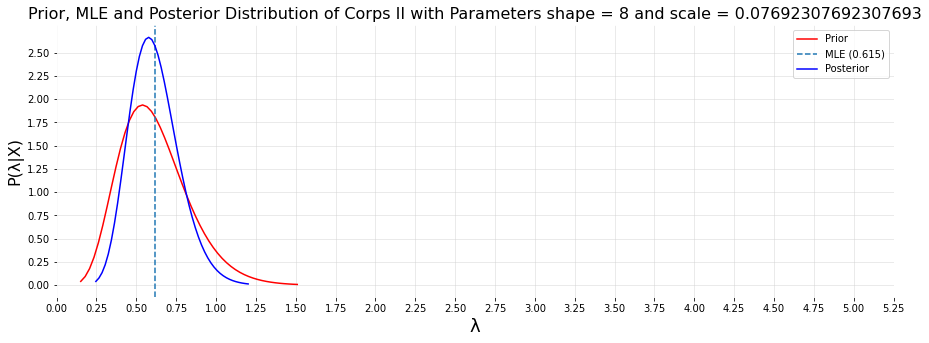

In [112]:
plot_prior_mle_posterior_distribution(k=8,theta=13,corps_name="II")

### Ploting Prior, Likelihood and Posterior of Corps IV

prior_shape : 6
prior_scale : 0.07692307692307693
mle : 0.46153846153846156
posterior_shape : 12
posterior_scale : 0.038461538461538464


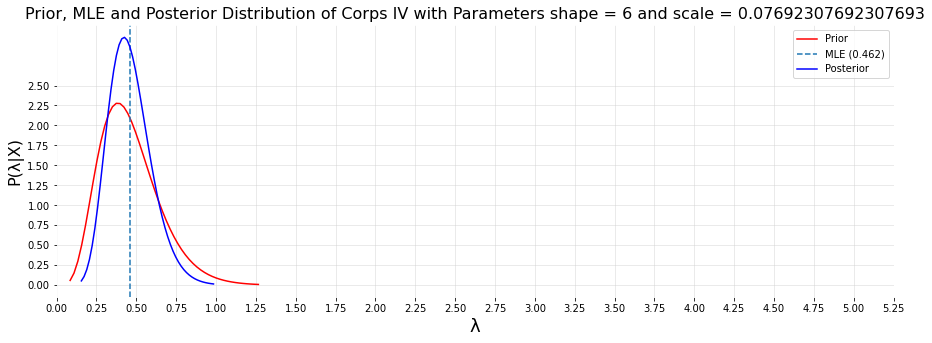

In [114]:
plot_prior_mle_posterior_distribution(k=6,theta=13,corps_name="IV")

### Ploting Prior, Likelihood and Posterior of Corps VI

prior_shape : 11
prior_scale : 0.07692307692307693
mle : 0.8461538461538461
posterior_shape : 22
posterior_scale : 0.038461538461538464


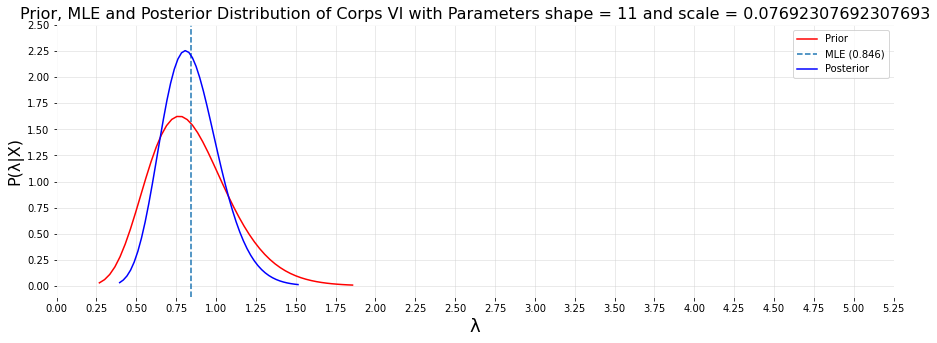

In [115]:
plot_prior_mle_posterior_distribution(k=11,theta=13,corps_name="VI")